### Content

This dataset contains the following:

    Total Records Count :: 484879 

    Domain Name: naukri.com 

    Date Range : 01st Jul 2019 - 30th Aug 2019  

    File Extension: csv

    Available Fields:
    -- Uniq Id,
    -- Crawl Timestamp,
    -- Job Title,
    -- Job Salary,
    -- Job Experience Required,
    -- Key Skills,
    -- Role Category,
    -- Location,
    -- Functional Area,
    -- Industry, Role 



<hr>

<b>First we will preprocess and clean each feature of the dataset, and then we will try to extract some information from cleaned data.</b>

In [5]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data.csv')
df.shape

(30000, 11)

In [7]:
df.head(3)

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Uniq Id                  30000 non-null  object
 1   Crawl Timestamp          30000 non-null  object
 2   Job Title                29425 non-null  object
 3   Job Salary               29950 non-null  object
 4   Job Experience Required  29427 non-null  object
 5   Key Skills               28729 non-null  object
 6   Role Category            27695 non-null  object
 7   Location                 29423 non-null  object
 8   Functional Area          29427 non-null  object
 9   Industry                 29427 non-null  object
 10  Role                     29099 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


Take-away: there are 11 columns and all these are object type


#Take-away: as per the shape, dataset has 30000 rows and 11 columns

Features

Uniq Id | object | Uniq Id value<br>
Crawl Timestamp | object | web crawling time<br>
Job Title | object | job work title<br>
Job Salary | object | job salart in range<br>
Job Experience Required | object | Experience required to apply the job<br>
Key Skills | object | key skill required for job<br>
Role Category | object | Role Category<br>
Location | object | job location<br>
Functional Area | object | functional role for job<br>
Industry | object | type of industry<br><br>
Role | object | type of Role<br>

Exploratory Data Analysis<br>
we will perform exploratory data analysis on given dataset to understand below points<br>

Find Unwanted Columns or Features which has only one value or unique values and which will not play important role in analysis<br>
Handle the missing values if there is any<br>
Explore, what are categorical features we have in given dataset<br>
Understand the features distribution<br>
Find the Top 15 Industries and Functional Areas for which maximum number of oportunies are available<br>
Find the Top 15 Locations where job opportunities are very high<br>
Find the Top 15 Role and Role category to which maximum number of recruiters are looking<br>
Find the Top 15 Job exp required in Years for which maximum number of oportunies are available<br>
Find the Top Job experiences levels for which maximum number of oportunies are available<br>
Find the Top 20 Key Skills for which maximum number of oportunies are available<br>

# 1. Find Unwanted Columns

Take-away: Uniq Id and Crawl Timestamp columns seem to be not usefull.


# Find missing values


In [10]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values and actual count is ',df[feature].isnull().sum())

print('Total entries:{}'.format(len(df)))

Job Title 0.0192  % missing values and actual count is  575
Job Salary 0.0017  % missing values and actual count is  50
Job Experience Required 0.0191  % missing values and actual count is  573
Key Skills 0.0424  % missing values and actual count is  1271
Role Category 0.0768  % missing values and actual count is  2305
Location 0.0192  % missing values and actual count is  577
Functional Area 0.0191  % missing values and actual count is  573
Industry 0.0191  % missing values and actual count is  573
Role 0.03  % missing values and actual count is  901
Total entries:30000


features_na = [features for features in df.columns if df[features].isnull().sum() > 0]:<br>

This line creates a list called features_na using list comprehension. It iterates over each column (features) in the DataFrame df.column<br>s.
For each column, it checks if the sum of null values (NaN values) in that column, calculated using df[features].isnull().sum(), is greater than<br> 0.
If the sum of null values is greater than 0 for a column, it includes that column name in the list features<br>_na.

In [11]:
# check what will be new shape after droping missing values
df.dropna(inplace=False).shape

(27005, 11)

Take-away: there are some missing values found in job title, job salary and in other features, specially Role Category feautre has max 2305 missing values. the number of missing values in each feature are not much. even if we drop all missing value still we will have good amount data to analyse. let us drop all missing values permanently.

In [12]:
#drop missing values
df.dropna(inplace=True)

In [13]:
#check shape
df.shape

(27005, 11)

<b>3. Find Features with One Value<b>

In [14]:
for column in df.columns:
    print(column,df[column].nunique())

Uniq Id 27005
Crawl Timestamp 26061
Job Title 21849
Job Salary 1038
Job Experience Required 247
Key Skills 25287
Role Category 204
Location 2428
Functional Area 69
Industry 122
Role 629


<h1>4. Explore the Categorical Features<h1>

let us try to explore the all important categorical features or columns

In [15]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['Uniq Id','Crawl Timestamp']))]
categorical_features

['Job Title',
 'Job Salary',
 'Job Experience Required',
 'Key Skills',
 'Role Category',
 'Location',
 'Functional Area',
 'Industry',
 'Role']

In [16]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Job Title and number of categories are 21849
The feature is Job Salary and number of categories are 1038
The feature is Job Experience Required and number of categories are 247
The feature is Key Skills and number of categories are 25287
The feature is Role Category and number of categories are 204
The feature is Location and number of categories are 2428
The feature is Functional Area and number of categories are 69
The feature is Industry and number of categories are 122
The feature is Role and number of categories are 629


<b>Take-away:<b>

there are 9 categorical features<br>
all features seems to be have very high number categorical values. let us understand these features one by one<br>
job title feature analysis can be ignored as it has high count around 22k uniq values and also same information can be found by analyzing the role feature

 <b>Find Categorical Feature Distribution<b>

let us understand these categorical features one by one

# Industry

In [21]:
df.groupby('Industry',sort=True)['Industry'].count()[0:15]

Industry
* A US based $4.0 billion world leader in staffing services to over 6000 customers globally. * World's largest "Technology" staffing company in the world today - IT, Telecom, Infrastructure and Engineering. * TEKsystems is a part of Allegis Group which is a $16.0 Billion US based privately held firm. One of the world's largest privately held companies (source: Forbes) * The 6th Largest staffing company in the world and the 2nd Largest in the US. * One of the top vendors to 90% of Fortune 500 companies. * Every year we deploy over 80,000 employees across different parts of the world. * Operations in North America, Europe and Asia with over 300 offices across locations. * In India, TEKsystems currently has 1000+ technical consultants employed at various Fortune 500 companies across the country. * For the second consecutive year, TEKsystems was named to Fortune magazine's "100 Best Companies to Work For" in 2014. * Please visit - www.teksystems.com ; www.allegisgroup.com, for mor

<b>Industry column has uncleaned data, let us clean this before analysing. let us group similary industries into generic one<b>

In [19]:
from re import search

def get_comman_job_industry(x):
    x = x.replace(",", " /")
    if (search('it-software', x.lower())):
        return 'Software Services'
    elif (search('call ', x.lower())):
        return 'Call Centre'
    elif (search('banking', x.lower()) or search('insurance', x.lower()) or search('finance', x.lower())):
        return 'Financial Services'
    elif (search('recruitment', x.lower())): 
        return 'Recruitment'
    elif (search('pharma', x.lower())): 
        return 'Pharma'
    elif (search('isp', x.lower())): 
        return 'Telcom / ISP'
    elif (search('ecommerce', x.lower())): 
        return 'Ecommerce'
    elif (search('fmcg', x.lower())): 
        return 'FMCG'
    elif (search('ngo', x.lower())): 
        return 'NGO'
    elif (search('medical', x.lower())): 
        return 'Medical'
    elif (search('aviation', x.lower())): 
        return 'Aviation'
    elif (search('fresher ', x.lower())): 
        return 'Fresher'
    elif (search('education', x.lower())): 
        return 'Education'
    elif (search('construction', x.lower())): 
        return 'Construction'
    elif (search('consulting', x.lower())): 
        return 'Consulting'
    elif (search('automobile', x.lower())): 
        return 'Automobile'
    elif (search('travel', x.lower())): 
        return 'Travels'
    elif (search('advertising', x.lower()) or search('broadcasting', x.lower())): 
        return 'Advertising'
    elif (search('transportation', x.lower())): 
        return 'Transportation'
    elif (search('agriculture', x.lower())): 
        return 'Agriculture'
    elif (search('agriculture', x.lower())): 
        return 'Agriculture'
    elif (search('industrial', x.lower())): 
        return 'Industrial Products'
    elif (search('media', x.lower())): 
        return 'Entertainment'
    elif (search('teksystems', x.lower()) or search('allegis', x.lower()) or search('aston', x.lower())
         or search('solugenix', x.lower()) or search('laurus', x.lower()) ):
        return 'Other'
    else:
        return x.strip()

In [21]:
df['New_Industry']=df['Industry'].apply(get_comman_job_industry)
a=df.groupby('New_Industry',sort=True)['New_Industry'].count().sort_values(ascending=False)[0:20]
a

New_Industry
Software Services                                10458
Recruitment                                       2522
Financial Services                                2301
Call Centre                                       1844
Education                                         1095
Medical                                            623
Ecommerce                                          563
Construction                                       513
Pharma                                             490
Consulting                                         486
Travels                                            480
Automobile                                         476
Entertainment                                      432
Industrial Products                                417
Advertising                                        390
Real Estate / Property                             341
Retail / Wholesale                                 294
Telcom / ISP                                       2

<b>let us plot these group by numbers into bar plot<b>

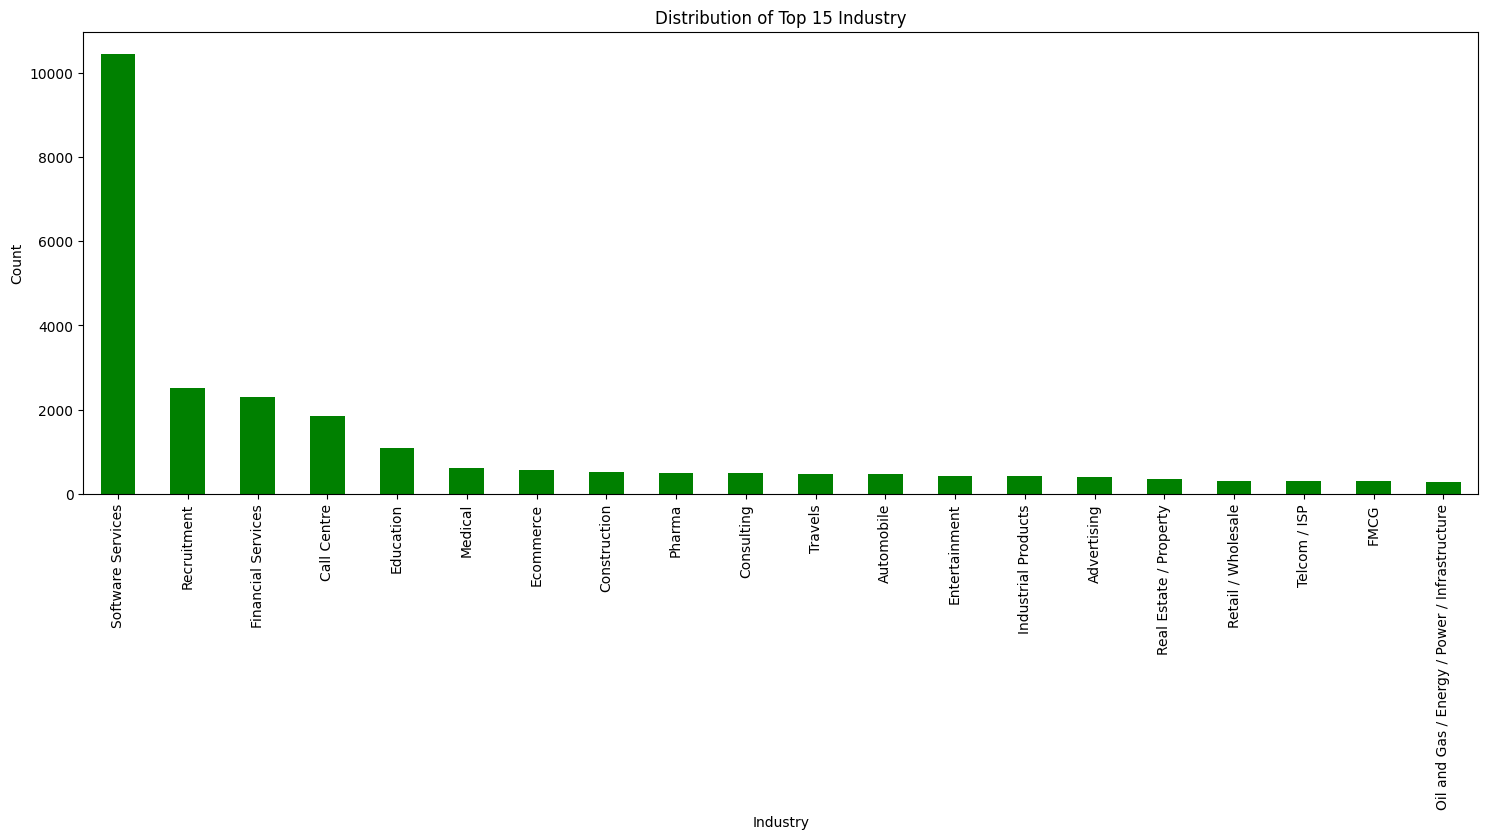

In [24]:
plt.figure(figsize=(18,6), facecolor='white')
a.plot.bar(color='green')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Distribution of Top 15 Industry')
plt.show()

<b>Take-away:<b> we can see from the barplot above, the industry as Software Services are the maximum followed by Recruitment<br>and then by Financial Services.

Functional Area

In [16]:
df.groupby('Functional Area',sort=True)['Functional Area'].count()[0:20]

Functional Area
* A US based $4.0 billion world leader in staffing services to over 6000 customers globally. * World's largest "Technology" staffing company in the world today - IT, Telecom, Infrastructure and Engineering. * TEKsystems is a part of Allegis Group which is a $16.0 Billion US based privately held firm. One of the world's largest privately held companies (source: Forbes) * The 6th Largest staffing company in the world and the 2nd Largest in the US. * One of the top vendors to 90% of Fortune 500 companies. * Every year we deploy over 80,000 employees across different parts of the world. * Operations in North America, Europe and Asia with over 300 offices across locations. * In India, TEKsystems currently has 1000+ technical consultants employed at various Fortune 500 companies across the country. * For the second consecutive year, TEKsystems was named to Fortune magazine's "100 Best Companies to Work For" in 2014. * Please visit - www.teksystems.com ; www.allegisgroup.com, 

<b>functional area column also has uncleaned data<b>,<br> let us clean this before analysing. let us group similary functional area into generic one and update unkown description to others

In [26]:
from re import search

def get_comman_func_area(x):
    x = x.replace(",", " /")
    if (search('beauty', x.lower())):
        return 'Beauty / Fitness'
    elif (search('teaching', x.lower())):
        return 'Teaching  / Education'
    elif (search('other', x.lower())):
        return 'Others'
    elif (search('teksystems', x.lower()) or search('allegis', x.lower()) or search('aston', x.lower())
         or search('solugenix', x.lower()) or search('laurus', x.lower()) ):
        return 'Other'
    else:
        return x.strip()

let us apply above custom method on functional area column and create new column that is New_Functional_Area. and finaly get the New_Functional_Area level count and sort in desc order

In [28]:
df['New_Functional_Area']=df['Functional Area'].apply(get_comman_func_area)
df.groupby('New_Functional_Area',sort=True)['New_Functional_Area'].count().sort_values(ascending=False)[0:30]

New_Functional_Area
IT Software - Application Programming  / Maintenance                7230
Sales  / Retail  / Business Development                             3985
ITES  / BPO  / KPO  / LPO  / Customer Service  / Operations         3121
HR  / Recruitment  / Administration  / IR                           1360
Accounts  / Finance  / Tax  / Company Secretary  / Audit            1333
Marketing  / Advertising  / MR  / PR  / Media Planning               894
Financial Services  / Banking  / Investments  / Insurance            701
Production  / Manufacturing  / Maintenance                           690
Teaching  / Education                                                690
Medical  / Healthcare  / R&D  / Pharmaceuticals  / Biotechnology     577
Others                                                               506
Engineering Design  / R&D                                            463
IT Software - ERP  / CRM                                             460
IT Software - QA & Testing     

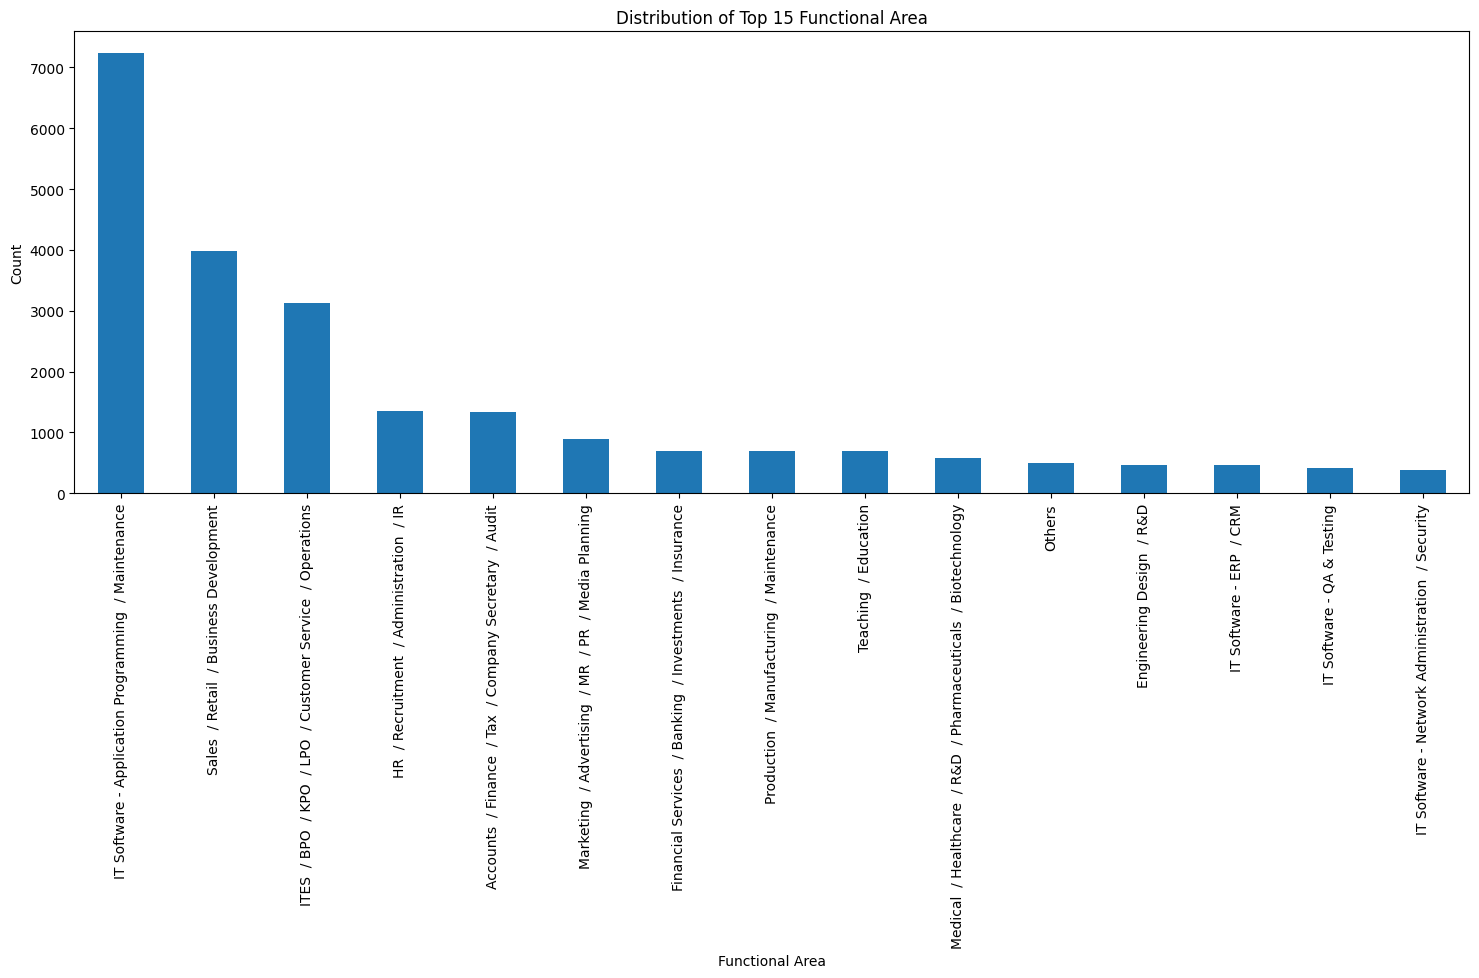

In [29]:
plt.figure(figsize=(18,6), facecolor='white')
df.groupby('New_Functional_Area',sort=True)['New_Functional_Area'].count().sort_values(ascending=False)[0:15].plot.bar()
plt.xlabel('Functional Area')
plt.ylabel('Count')
plt.title('Distribution of Top 15 Functional Area')
plt.show()

Take-away: we can see from the barplot above, the Functional Area such as IT Software - Application Programming are the maximum followed by Sales and then by BPO/KPO

Location

In [21]:
df.groupby('Location',sort=True)['Location'].count()[0:30]

Location
 Ahmedabad                                                                                         7
 Ahmedabad, Ankleshwar, Bharuch, Daman & Diu, Gandhidham, Gandhinagar, Rajkot, Vapi, Vadodara      1
 Ahmedabad, Mumbai, Vadodara                                                                       1
 Bengaluru                                                                                       229
 Bengaluru, Chennai                                                                                2
 Bengaluru, Chennai, Hyderabad                                                                     2
 Bengaluru, Chennai, Hyderabad, Mysore                                                             1
 Bengaluru, Chennai, Hyderabad, Pune                                                               3
 Bengaluru, Chennai, Hyderabad, Pune, Kolkata                                                      4
 Bengaluru, Chennai, Mysore                                                       

Location column has multiple locatios separated by comm (,). let us separate all these location into individual rows, so that it will easy to analyse its count based on job opportunities

In [30]:
def get_location(df):
    df_new=pd.DataFrame()
    for index, row in df.iterrows():
        for loc in row['Location'].split(','):
            loc_df = pd.DataFrame([loc])
            df_new = pd.concat([df_new,loc_df],ignore_index=True)
    return df_new 

let us create new dataframe to hold these location splits

In [31]:
Location_df = get_location(df)
Location_df.columns = ['Location']

In [32]:
Location_df.groupby('Location',sort=True)['Location'].count().sort_values(ascending=False)[0:30]

Location
Bengaluru         5913
Mumbai            4435
Pune              3060
Hyderabad         2802
Gurgaon           2578
Chennai           2300
Noida             1723
Delhi NCR         1629
Delhi             1613
Kolkata           1610
Ahmedabad         1378
Navi Mumbai        493
Chandigarh         488
Mumbai Suburbs     318
 Bengaluru         262
Faridabad          215
Thane              209
Ghaziabad          186
 Hyderabad         176
Greater Noida      163
Coimbatore         114
Vadodara           101
 Pune              100
 Mumbai             99
Jaipur              98
haryana             91
 Gurgaon            87
 Chennai            80
Lucknow             78
Nagpur              77
Name: Location, dtype: int64

there are same location with different name, let us group these location

In [33]:
from re import search
def get_common_location(x):
    x = x.replace(",", " /")
    if (search('bengaluru', x.lower()) or search('bangalore', x.lower())):
        return 'Bengaluru'
    elif (search('ahmedabad', x.lower())):
        return 'Ahmedabad'
    elif (search('chennai', x.lower())):
        return 'Chennai'
    elif (search('coimbatore', x.lower())):
        return 'Coimbatore'
    elif (search('delhi', x.lower()) or search('noida', x.lower()) or search('gurgaon', x.lower())):
        return 'Delhi NCR'
    elif (search('hyderabad', x.lower())):
        return 'Hyderabad'
    elif (search('kolkata', x.lower())):
        return 'Kolkata'
    elif (search('mumbai', x.lower())):
        return 'Mumbai'
    elif (search('Pune', x.lower())):
        return 'pune'
    elif (search('other', x.lower())):
        return 'Others'
    else:
        return x.strip()

In [34]:
Location_df['New_Location']=Location_df['Location'].apply(get_common_location)

In [28]:
Location_df.groupby('New_Location',sort=True)['New_Location'].count().sort_values(ascending=False)[0:15]

New_Location
Delhi NCR     8318
Bengaluru     6457
Mumbai        5508
Pune          3160
Hyderabad     3102
Chennai       2399
Kolkata       1672
Ahmedabad     1438
Chandigarh     498
Faridabad      218
Thane          213
Ghaziabad      186
Coimbatore     122
Vadodara       104
Jaipur          98
Name: New_Location, dtype: int64

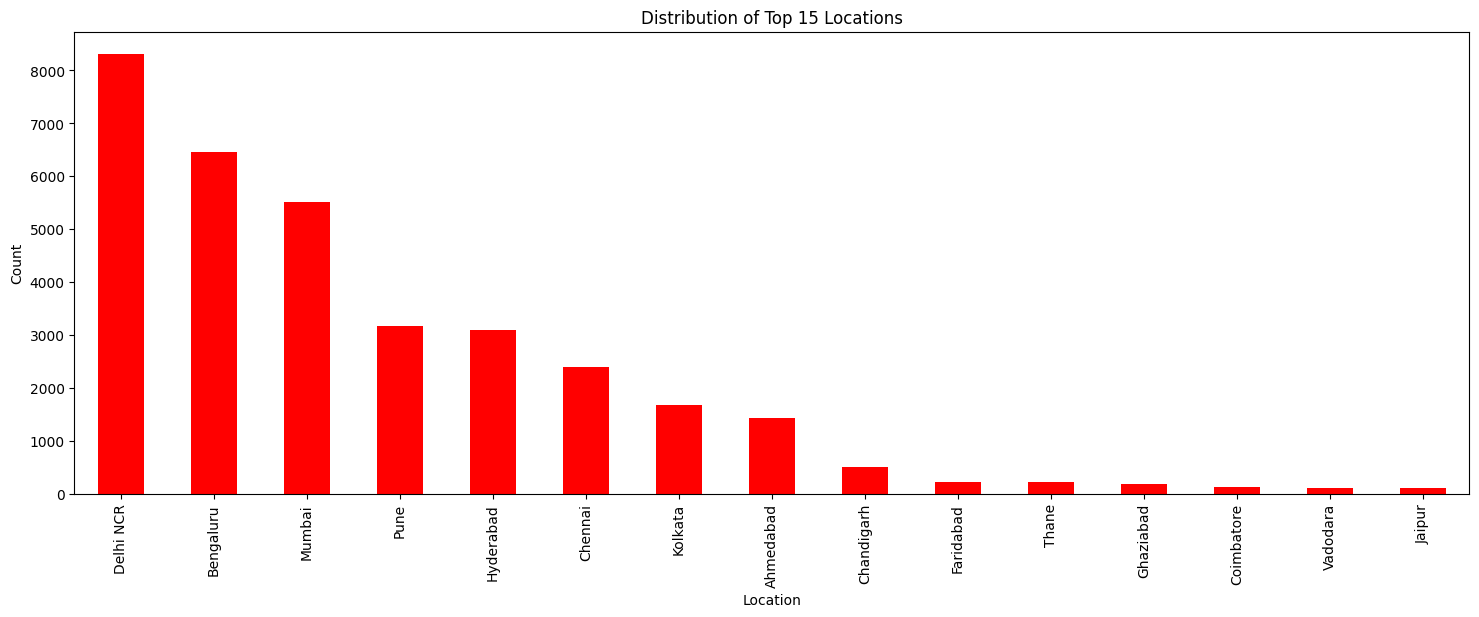

In [35]:
plt.figure(figsize=(18,6), facecolor='white')
Location_df.groupby('New_Location',sort=True)['New_Location'].count().sort_values(ascending=False)[0:15].plot.bar(color="red")
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Top 15 Locations')
plt.show()

Take-away: we can see from the barplot above, the location such as Delhi NCR are the maximum followed by Bengaluru and then by Mumbai.

# Role Category

In [36]:
df.groupby('Role Category',sort=True)['Role Category'].count().sort_values(ascending=False)[0:15]

Role Category
Programming & Design                          8365
Voice                                         2342
Retail Sales                                  2316
HR/ Recruitment / IR                          1097
Admin/Maintenance/Security/Datawarehousing     910
Accounts                                       862
Senior Management                              856
Other                                          850
Corporate Sales                                694
Production/Manufacturing/Maintenance           569
System Design/Implementation/ERP/CRM           492
Marketing                                      467
Medical Professional                           409
Creative                                       389
Engineering Design                             355
Name: Role Category, dtype: int64

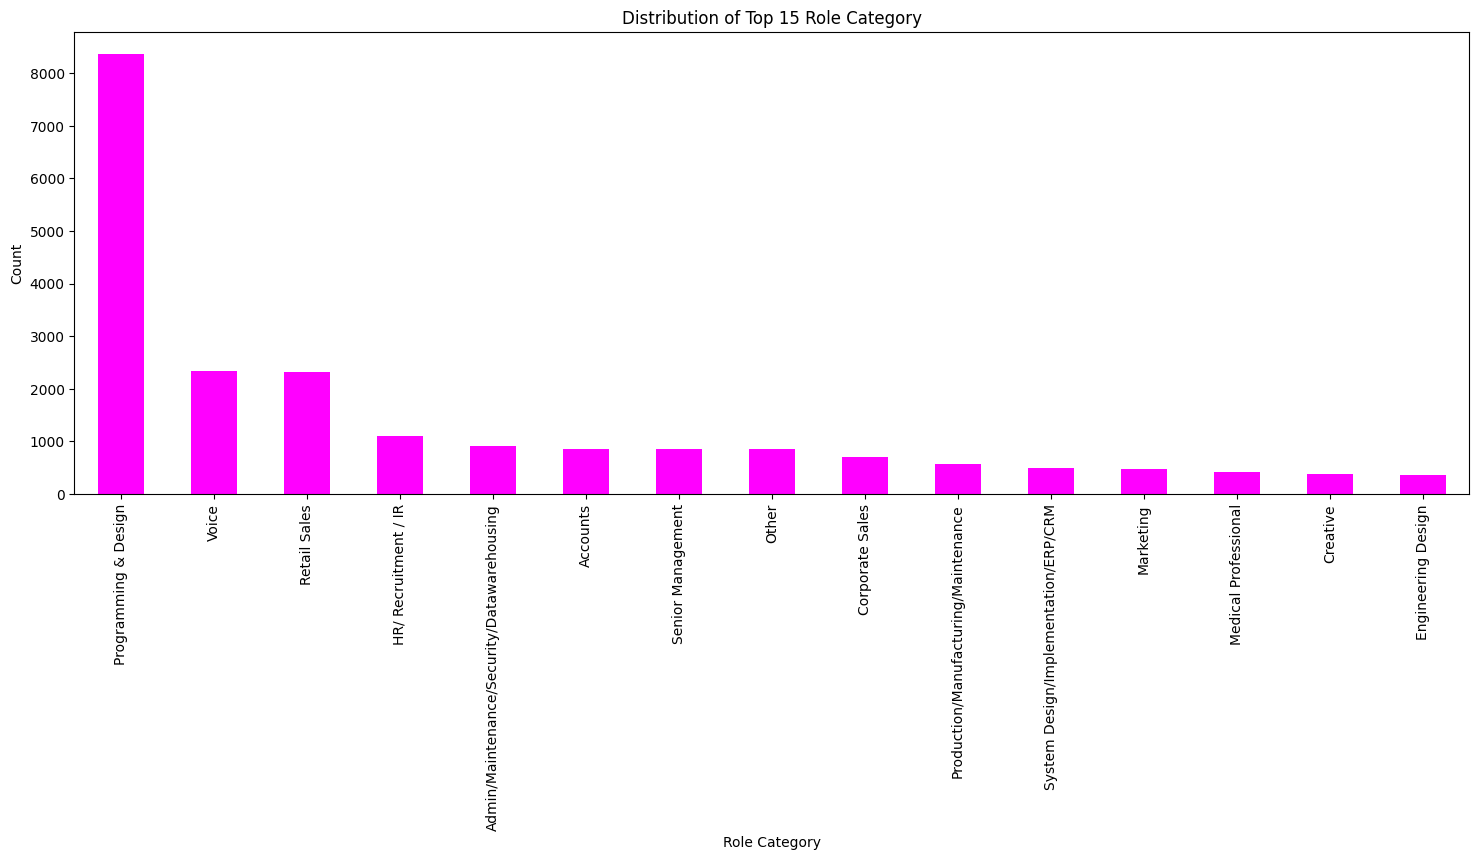

In [37]:
plt.figure(figsize=(18,6), facecolor='white')
df.groupby('Role Category',sort=True)['Role Category'].count().sort_values(ascending=False)[0:15].plot.bar(color="magenta")
plt.xlabel('Role Category')
plt.ylabel('Count')
plt.title('Distribution of Top 15 Role Category')
plt.show()

Take-away: we can see from the barplot above, the role category such as Programming & Design are the maximum followed by voice and then by retail sales.

Role

In [38]:
df.groupby('Role',sort=True)['Role'].count().sort_values(ascending=False)[0:15]

Role
Software Developer                            6250
Associate/Senior Associate -(NonTechnical)    1690
Sales/Business Development Manager            1530
Sales Executive/Officer                       1152
Team Lead/Technical Lead                       833
Associate/Senior Associate -(Technical)        503
Accounts Executive/Accountant                  499
Recruitment Executive                          416
Testing Engineer                               402
Fresher                                        374
Technical Architect                            355
System Administrator                           314
HR Executive                                   289
Business Analyst                               264
Telecalling/Telemarketing Executive            224
Name: Role, dtype: int64

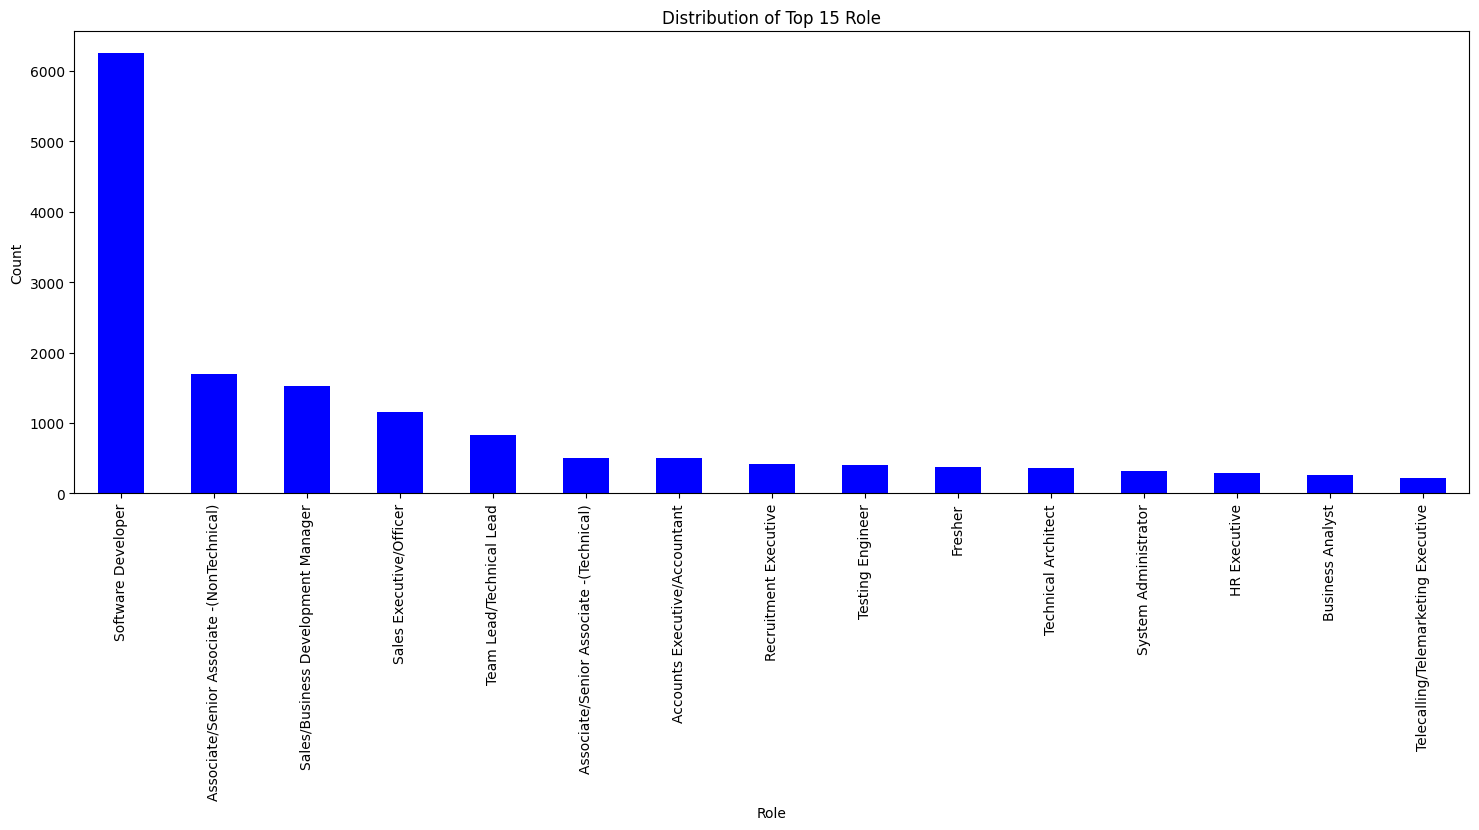

In [39]:
plt.figure(figsize=(18,6), facecolor='white')
df.groupby('Role',sort=True)['Role'].count().sort_values(ascending=False)[0:15].plot.bar(color="blue")
plt.xlabel('Role')
plt.ylabel('Count')
plt.title('Distribution of Top 15 Role')
plt.show()

Take-away: we can see from the barplot above, the role such as software devloper are the maximum followed by Non Tech and then by sales.

Job Experience Required

In [40]:
df.groupby('Job Experience Required',sort=True)['Job Experience Required'].count()[0:30]

Job Experience Required
0 - 1 Years      36
0 - 2 Years      35
0 - 3 Years      29
0 - 4 Years      20
0 - 5 Years      45
0 Years          18
1 - 2 Years      13
1 - 3 Years      55
1 - 4 Years      31
1 - 5 Years      58
1 - 6 Years      54
10 - 11 Years     2
10 - 12 Years    18
10 - 13 Years     4
10 - 14 Years     4
10 - 15 Years    26
10 - 16 Years     3
10 - 17 Years     6
10 - 18 Years     4
10 - 20 Years    10
11 - 12 Years     1
11 - 17 Years     1
11 - 20 Years     1
12 - 13 Years     1
12 - 14 Years     1
12 - 15 Years     5
12 - 16 Years     4
12 - 17 Years     1
12 - 18 Years     4
12 - 19 Years     1
Name: Job Experience Required, dtype: int64

this column has two years range with unit as either Years and yrs. let us update all these units to yrs

In [41]:
df['New_Job_Exp']=df['Job Experience Required'].apply(lambda x: x.replace("Years", "yrs"))

In [42]:
df.groupby('New_Job_Exp',sort=True)['New_Job_Exp'].count().sort_values(ascending=False)[0:15]

New_Job_Exp
2 - 5 yrs     1859
2 - 7 yrs     1541
5 - 10 yrs    1406
3 - 8 yrs     1267
1 - 3 yrs     1086
1 - 6 yrs      966
3 - 5 yrs      939
1 - 5 yrs      897
0 - 5 yrs      862
0 - 1 yrs      791
2 - 4 yrs      780
0 - 2 yrs      759
4 - 9 yrs      746
0 - 3 yrs      726
2 - 6 yrs      690
Name: New_Job_Exp, dtype: int64

let us also plot these group by numbers into bar plot

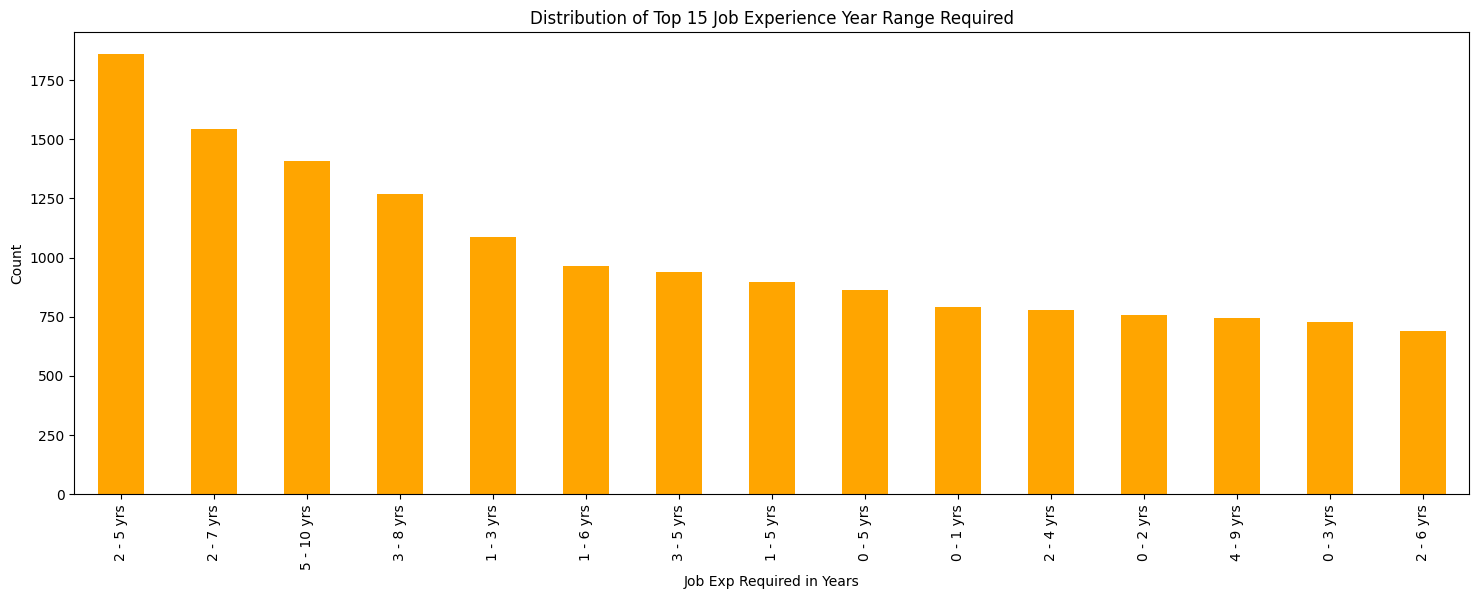

In [43]:

plt.figure(figsize=(18,6), facecolor='white')
df.groupby('New_Job_Exp',sort=True)['New_Job_Exp'].count().sort_values(ascending=False)[0:15].plot.bar(color="orange")
plt.xlabel('Job Exp Required in Years')
plt.ylabel('Count')
plt.title('Distribution of Top 15 Job Experience Year Range Required')
plt.show()


Let us understand what kind of job experiences level are most commonly published. For better understanding, we will divided the various ranges as follows:

0-2 : Freshers<br>
2-5 : Intermediate<br>
5-8 : Lead<br>
8-12 : Manager<br>
12-16 : Senior Manager<br>
16-20 : Executive<br>
20-above : Senior Executive<br>

In [44]:
import re
def get_exp_level(x):
    if re.findall('-',x):
        lst =x.replace('yrs','').strip().split('-')
        #print (x)
        lvl =(int(lst[0].strip())+int(lst[1].strip()))/2
        if (lvl >= 0 and lvl <= 2):
            return ('Freshers')
        elif (lvl >= 2 and lvl <= 5):
            return ('Intermediate')
        elif (lvl >= 5 and lvl <= 8):
            return ('Lead')
        elif (lvl >= 8 and lvl <= 12):
            return ('Manager')
        elif (lvl >= 12 and lvl <= 16):
            return ('Senior Manager')
        elif (lvl >= 16 and lvl <= 20):
            return ('Executive')
        elif (lvl >= 20):
            return ('Senior Executive')
        else:
            return('Others')
    else:
        return('Others')

let us apply above custom method on New_Job_Exp column and create new column that is New_Exp_Level. and finaly get the exp level count

In [45]:
df['New_Exp_Level']=df['New_Job_Exp'].apply(get_exp_level)

In [46]:
df.groupby('New_Exp_Level',sort=True)['New_Exp_Level'].count().sort_values(ascending=False)[0:30]

New_Exp_Level
Intermediate        12031
Lead                 6498
Freshers             4584
Manager              2499
Senior Manager        991
Executive             337
Senior Executive       45
Others                 20
Name: New_Exp_Level, dtype: int64

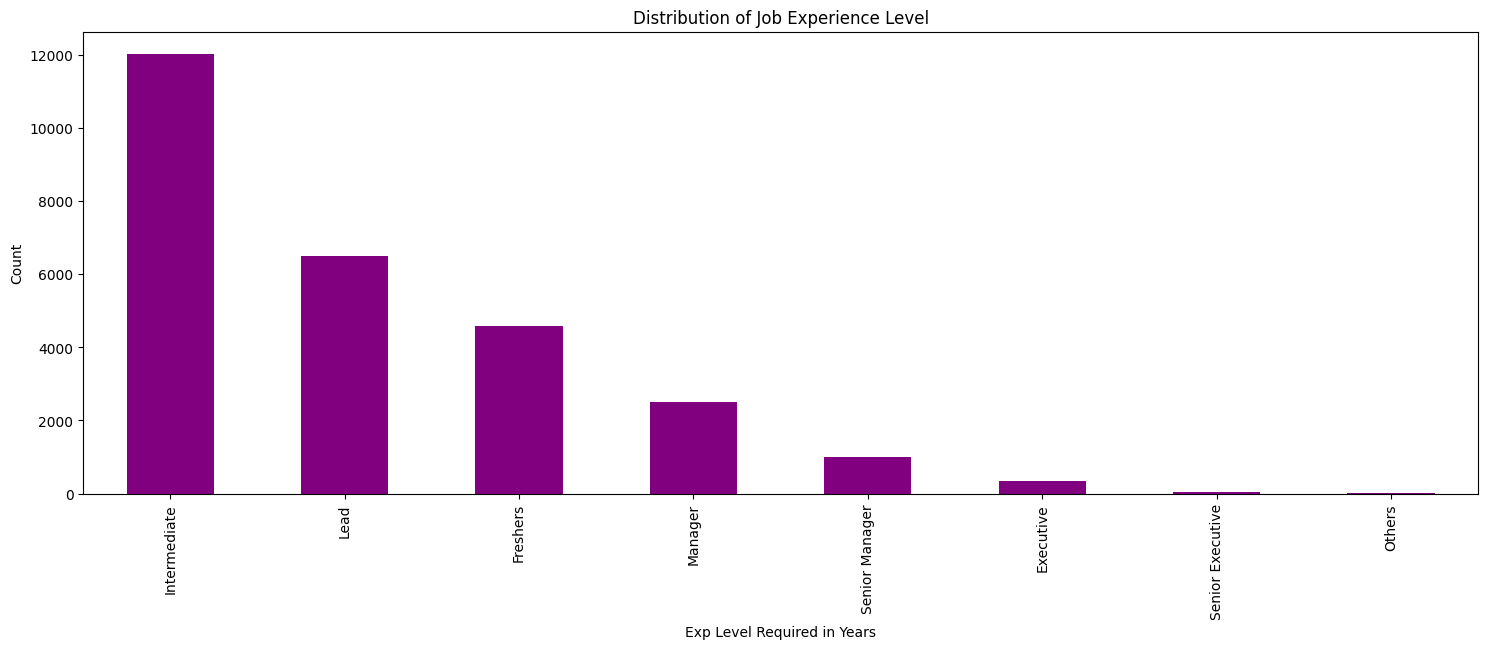

In [47]:
plt.figure(figsize=(18,6), facecolor='white')
df.groupby('New_Exp_Level',sort=True)['New_Exp_Level'].count().sort_values(ascending=False).plot.bar(color="purple")
plt.xlabel('Exp Level Required in Years')
plt.ylabel('Count')
plt.title('Distribution of Job Experience Level')
plt.show()

Take-away: As we can see, most job posting required intermediate level experience professionals that is about 2-5 years exp holders followed by Lead Exp (5-8 Years) and then Freshers (0-2 Years).

Key Skills

In [48]:
df.groupby('Key Skills',sort=True)['Key Skills'].count()[0:30]

Key Skills
& centOS| Redhat| server| virtualization| Switches| linux| Router| Vmware| applications| hardware                             1
.NET Architect| CSS| Cloud| Microsoft Azure| HTML| BootStrap| JQuery| CTO                                                     1
.NET| HTML| Python| assembly language| JavaScript| Oracle| SQL                                                                1
.NET| HTML| Python| assembly language| JavaScript| design| Oracle| SQL                                                        1
.NET| HTML| Python| assembly language| JavaScript| developer| it| Oracle| SQL                                                 1
.NET| HTML| Python| assembly language| JavaScript| mobile| Oracle| SQL                                                        1
.Net                                                                                                                          2
.Net Architect| solution architect| .Net| MVC| technical architect                           

key skill are sperated by pipeline (|), let us split and arrange the skills in grou

In [50]:


def get_skills(df):
    skills_list = [skill for skills in df['Key Skills'].str.split('|') for skill in skills]
    df_new = pd.DataFrame(skills_list, columns=['key_skills'])
    return df_new
  

In [51]:
key_skill_df = get_skills(df)
key_skill_df.columns = ['key_skills']

In [52]:
key_skill_df.groupby('key_skills',sort=True)['key_skills'].count().sort_values(ascending=False)[0:20]

key_skills
Javascript              1355
HTML                    1236
SQL                     1228
Sales                   1190
Python                   979
Management               829
Recruitment              784
Business Executive       776
MySQL                    727
Monitoring               654
Java                     648
Technical support        646
design                   630
development              620
Linux                    606
Analytical               605
Business Development     598
C                        585
Computer science         581
jQuery                   576
Name: key_skills, dtype: int64

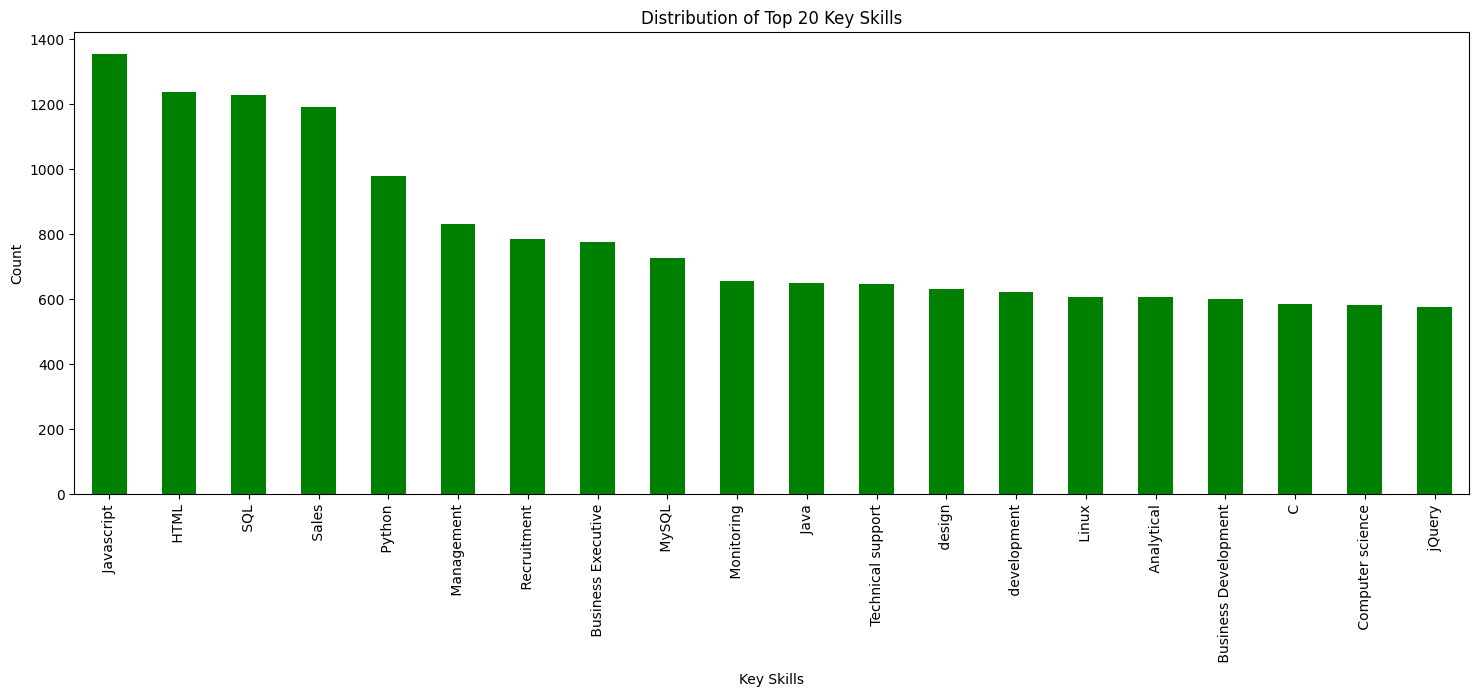

In [53]:
plt.figure(figsize=(18,6), facecolor='white')
key_skill_df.groupby('key_skills',sort=True)['key_skills'].count().sort_values(ascending=False)[0:20].plot.bar(color="Green")
plt.xlabel('Key Skills')
plt.ylabel('Count')
plt.title('Distribution of Top 20 Key Skills')
plt.show()

<b>Conclusion</b>
Given dataset has 30000 rows and 11 columns<br>
Uniq Id and Crawl Timestamp columns are seems to be not usefull<br>
There are some missing values found in job title, job salary and in other features, specially Role Category feautre has max 2305<br> missing values. the number of missing values in each feature are not much. even if we drop all missing value still we <br>will have good amount data to analyse<br>
There are 9 categorical features for which we tried to anyze<br>
All features seems to be have very high number of categorical values<br>.
Job title feature analysis can be ignored as it has high count around 22k unique values and also same information can be found <br>by anyzing the role and its categoty features<br>
Industry, Functional Area and few other columns have uncleaned data and after cleaning the data we found that<br>
Industry as Software Services are the maximum followed by Recruitment and then by Financial Services.<br>
Functional Area such as IT Software - Application Programming are the maximum followed by Sales and then by BPO/KPO.<br>
Location column has multiple locatios separated by comm (,), after separated these we found that the location such as Delhi NCR<br> are the maximum followed by Bengaluru and then by Mumbai<br>
Role category such as Programming & Design are the maximum followed by voice and then by retail sales.<br>
Most job posting required intermediate level experience professionals that is about 2-5 years exp holders followed by Lead Exp <br>(5-8 Years) and then Freshers (0-2 Years).<br>
Key skill are sperated by pipeline (|), After separated these we found that some of the top skills are Javascript, HTML, SQL, Sales and Python<br>